In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import keras
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dropout
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from keras.models import load_model
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
from keras.datasets import mnist, cifar10
from keras import optimizers
import pandas as pd
import itertools

In [3]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)
50000
50000
10000
10000


[0 1 2 3 4 5 6 7 8 9] 
 Number of classes 10


,0
0,airplane
1,automobile
2,bird
3,cat
4,deer
5,dog
6,frog
7,horse
8,ship
9,truck


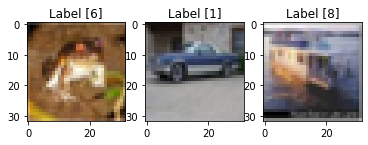

In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

plt.subplot(1,3,1)
plt.imshow(x_train[0],cmap='gray')
plt.title('Label'+ ' ' + str(y_train[0]))
plt.subplot(1,3,2)
plt.imshow(x_train[10000],cmap='gray')
plt.title('Label'+ ' ' + str(y_train[10000]))
plt.subplot(1,3,3)
plt.imshow(x_test[6000],cmap='gray')
plt.title('Label'+ ' ' + str(y_test[6000]))

print('\n')
print(str(np.unique(y_train)) + ' \n ' + 'Number of classes' + ' ' + str(len(np.unique(y_train))))

lab = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
labels = pd.DataFrame(lab,(np.unique(y_train)))
labels.head(10)

In [5]:
x_train = x_train.reshape(x_train.shape[0],32,32,3).astype('float32')
x_test = x_test.reshape(x_test.shape[0],32,32,3).astype('float32')
x_train = x_train / 255
x_test = x_test / 255

laben = LabelEncoder()
y_train = laben.fit_transform(y_train) # This gives Label (Eg 3)
y_train = to_categorical(y_train,10) # Do One hot encoding (Eg [0,0,0,1,0....0])
y_test = laben.fit_transform(y_test) 
y_test = to_categorical(y_test,10) 

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print('One hot Encoded', y_train[1100])
print('One hot Encoded', y_test[9000])

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 10)
(10000, 10)
One hot Encoded [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
One hot Encoded [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [6]:
model = Sequential()
model.add(Conv2D(128, (3, 3), padding='same',activation='relu', input_shape = (32,32,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))	
model.add(Dense(10, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 128)       3584      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 64)        73792     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0

In [7]:
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [8]:
checkpoint = ModelCheckpoint('/kaggle/working/model.h5',
                             monitor = 'val_loss',
                             mode = 'min',
                             save_best_only=True,
                             verbose = 1
                            )

callbacks = [checkpoint]

In [10]:
history = model.fit(x_train, y_train,
                   epochs = 100,
                   validation_split=0.2,
                   batch_size=32,
                    callbacks = callbacks
                   )
model.save('/kaggle/working/model_1.h5')

Epoch 1/100
1243/1250 [============================>.] - ETA: 0s - loss: 1.4784 - accuracy: 0.4654
Epoch 00001: val_loss improved from 1.52235 to 1.37887, saving model to /kaggle/working/model.h5
1250/1250 [==============================] - 8s 6ms/step - loss: 1.4778 - accuracy: 0.4654 - val_loss: 1.3789 - val_accuracy: 0.5118
Epoch 2/100
1245/1250 [============================>.] - ETA: 0s - loss: 1.3263 - accuracy: 0.5242
Epoch 00002: val_loss improved from 1.37887 to 1.21097, saving model to /kaggle/working/model.h5
1250/1250 [==============================] - 8s 6ms/step - loss: 1.3263 - accuracy: 0.5245 - val_loss: 1.2110 - val_accuracy: 0.5851
Epoch 3/100
1247/1250 [============================>.] - ETA: 0s - loss: 1.2142 - accuracy: 0.5701
Epoch 00003: val_loss improved from 1.21097 to 1.14646, saving model to /kaggle/working/model.h5
1250/1250 [==============================] - 8s 6ms/step - loss: 1.2142 - accuracy: 0.5701 - val_loss: 1.1465 - val_accuracy: 0.5993
Epoch 4/100
1

Epoch 28/100
1249/1250 [============================>.] - ETA: 0s - loss: 0.6822 - accuracy: 0.7701
Epoch 00028: val_loss did not improve from 0.75295
1250/1250 [==============================] - 8s 6ms/step - loss: 0.6821 - accuracy: 0.7701 - val_loss: 0.8204 - val_accuracy: 0.7546
Epoch 29/100
1245/1250 [============================>.] - ETA: 0s - loss: 0.6792 - accuracy: 0.7720
Epoch 00029: val_loss did not improve from 0.75295
1250/1250 [==============================] - 8s 6ms/step - loss: 0.6795 - accuracy: 0.7720 - val_loss: 0.8130 - val_accuracy: 0.7656
Epoch 30/100
1250/1250 [==============================] - ETA: 0s - loss: 0.6751 - accuracy: 0.7722
Epoch 00030: val_loss did not improve from 0.75295
1250/1250 [==============================] - 8s 7ms/step - loss: 0.6751 - accuracy: 0.7722 - val_loss: 0.7566 - val_accuracy: 0.7618
Epoch 31/100
1246/1250 [============================>.] - ETA: 0s - loss: 0.6776 - accuracy: 0.7728
Epoch 00031: val_loss did not improve from 0.752

Epoch 57/100
1244/1250 [============================>.] - ETA: 0s - loss: 0.6255 - accuracy: 0.7926
Epoch 00057: val_loss did not improve from 0.72801
1250/1250 [==============================] - 8s 6ms/step - loss: 0.6259 - accuracy: 0.7926 - val_loss: 1.0105 - val_accuracy: 0.7604
Epoch 58/100
1242/1250 [============================>.] - ETA: 0s - loss: 0.6228 - accuracy: 0.7937
Epoch 00058: val_loss did not improve from 0.72801
1250/1250 [==============================] - 8s 6ms/step - loss: 0.6234 - accuracy: 0.7934 - val_loss: 0.9394 - val_accuracy: 0.7655
Epoch 59/100
1242/1250 [============================>.] - ETA: 0s - loss: 0.6261 - accuracy: 0.7934
Epoch 00059: val_loss did not improve from 0.72801
1250/1250 [==============================] - 8s 7ms/step - loss: 0.6261 - accuracy: 0.7936 - val_loss: 0.9971 - val_accuracy: 0.7379
Epoch 60/100
1243/1250 [============================>.] - ETA: 0s - loss: 0.6254 - accuracy: 0.7941
Epoch 00060: val_loss did not improve from 0.728

Epoch 86/100
1250/1250 [==============================] - ETA: 0s - loss: 0.6111 - accuracy: 0.8004
Epoch 00086: val_loss did not improve from 0.70844
1250/1250 [==============================] - 8s 6ms/step - loss: 0.6111 - accuracy: 0.8004 - val_loss: 0.9947 - val_accuracy: 0.7597
Epoch 87/100
1247/1250 [============================>.] - ETA: 0s - loss: 0.6122 - accuracy: 0.8008
Epoch 00087: val_loss did not improve from 0.70844
1250/1250 [==============================] - 8s 6ms/step - loss: 0.6124 - accuracy: 0.8008 - val_loss: 0.8359 - val_accuracy: 0.7743
Epoch 88/100
1249/1250 [============================>.] - ETA: 0s - loss: 0.6197 - accuracy: 0.7992
Epoch 00088: val_loss did not improve from 0.70844
1250/1250 [==============================] - 8s 6ms/step - loss: 0.6195 - accuracy: 0.7993 - val_loss: 0.8708 - val_accuracy: 0.7681
Epoch 89/100
1246/1250 [============================>.] - ETA: 0s - loss: 0.6164 - accuracy: 0.7995
Epoch 00089: val_loss did not improve from 0.708

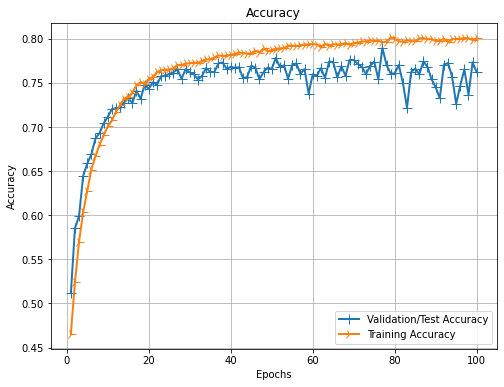

In [24]:
plt.figure(figsize=(8,6))
history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.title('Accuracy')
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

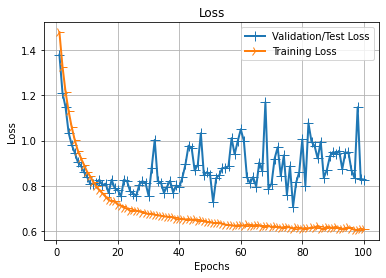

In [22]:
plt.figure(figsize=(8,6))
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.title('Loss')
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

In [17]:
Score = model.evaluate(x_test,y_test)
print(' Test Accuracy ', Score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.8354 - accuracy: 0.7605
 Test Accuracy  0.7605000138282776


In [18]:
y_test_ = np.argmax(y_test, axis=1)
y_pred_ = model.predict_classes(x_test)

In [19]:
print('Classification Report \n')
print(classification_report(y_test_, y_pred_, target_names = lab))

Classification Report 

              precision    recall  f1-score   support

    airplane       0.81      0.81      0.81      1000
  automobile       0.97      0.71      0.82      1000
        bird       0.76      0.57      0.65      1000
         cat       0.73      0.47      0.57      1000
        deer       0.65      0.81      0.72      1000
         dog       0.72      0.70      0.71      1000
        frog       0.62      0.93      0.75      1000
       horse       0.85      0.81      0.83      1000
        ship       0.85      0.89      0.87      1000
       truck       0.78      0.90      0.84      1000

    accuracy                           0.76     10000
   macro avg       0.77      0.76      0.76     10000
weighted avg       0.77      0.76      0.76     10000



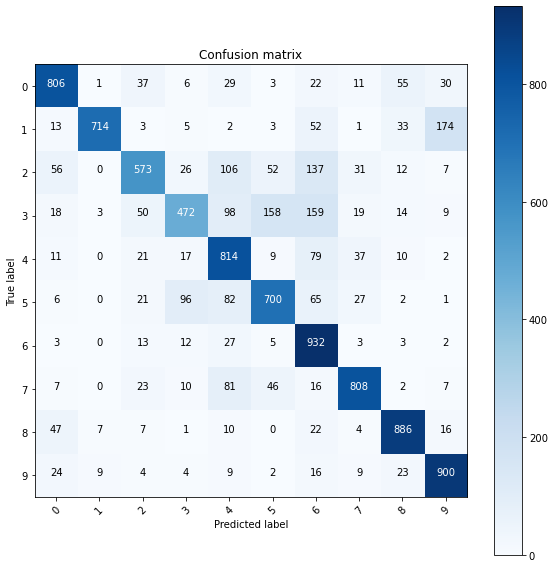

In [20]:
plt.figure(figsize=(8,8))

classes = 10
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


confusion_mtx = confusion_matrix(y_test_, y_pred_) 
plot_confusion_matrix(confusion_mtx, classes = range(10)) 